In [1]:
import pandas as pd
import plotly as px
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind


In [2]:
MidWest_path="Midwest_data.csv"


In [3]:
MidWestRegion=pd.read_csv('Midwest_data.csv')
MidWestRegion

,State,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Illinois,Midwest,Male,Very good,2,0,Within past year (anytime less than 12 months ...,Yes,8,All,...,1.80,108.86,33.47,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",Yes,Yes
1,Illinois,Midwest,Female,Good,0,0,Within past year (anytime less than 12 months ...,Yes,8,None of them,...,1.60,58.97,23.03,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
2,Illinois,Midwest,Male,Good,2,0,Within past year (anytime less than 12 months ...,Yes,7,None of them,...,1.75,99.79,32.49,Yes,No,Yes,No,"Yes, received tetanus shot, but not Tdap",Yes,No
3,Illinois,Midwest,Male,Excellent,0,0,Within past year (anytime less than 12 months ...,Yes,7,1 to 5,...,1.80,74.84,23.01,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Illinois,Midwest,Female,Good,30,3,Within past year (anytime less than 12 months ...,No,9,"6 or more, but not all",...,1.50,69.40,30.90,No,No,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65778,Wisconsin,Midwest,Male,Very good,5,0,Within past year (anytime less than 12 months ...,Yes,8,None of them,...,1.80,102.06,31.38,Yes,No,Yes,Yes,"Yes, received Tdap",No,Yes
65779,Wisconsin,Midwest,Female,Good,0,5,Within past 2 years (1 year but less than 2 ye...,Yes,6,None of them,...,1.73,104.33,34.97,Yes,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,Yes
65780,Wisconsin,Midwest,Female,Excellent,1,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,...,1.57,58.97,23.78,Yes,Yes,Yes,No,"Yes, received Tdap",No,Yes
65781,Wisconsin,Midwest,Female,Fair,0,14,Within past 5 years (2 years but less than 5 y...,Yes,5,None of them,...,1.68,92.08,32.76,No,No,No,No,"Yes, received Tdap",No,No


In [4]:
MidWestRegion.PhysicalActivities.replace(('Yes','No'), (1,0),inplace=True)
MidWestRegion.AlcoholDrinkers.replace(('Yes','No'), (1,0),inplace=True)
MidWestRegion.SmokerStatus.replace(('Former smoked','Never smoker','Current smoker-now smokes every day','Current smoker-now smokes some days'),(0,1,2,3),inplace=True)
MidWestRegion.ECigaretteUsage.replace(('Never used e-cigarettes in my entire life','Not at all (right now)','Use them some days','Use them every day'),(0,1,2,3),inplace=True)
MidWestRegion.GeneralHealth.replace(('Excellent','Very good','Good','Fair','Poor'), (0,1,2,3,4),inplace=True)
MidWestRegion.RemovedTeeth.replace(('None of them','1 to 5','6 or more, but not all','All'), (0,1,2,3,),inplace=True)
MidWestRegion.head(15)

,State,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Illinois,Midwest,Male,1,2,0,Within past year (anytime less than 12 months ...,1,8,3,...,1.80,108.86,33.47,0,No,Yes,No,"No, did not receive any tetanus shot in the pa...",Yes,Yes
1,Illinois,Midwest,Female,2,0,0,Within past year (anytime less than 12 months ...,1,8,0,...,1.60,58.97,23.03,0,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
2,Illinois,Midwest,Male,2,2,0,Within past year (anytime less than 12 months ...,1,7,0,...,1.75,99.79,32.49,1,No,Yes,No,"Yes, received tetanus shot, but not Tdap",Yes,No
3,Illinois,Midwest,Male,0,0,0,Within past year (anytime less than 12 months ...,1,7,1,...,1.80,74.84,23.01,0,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Illinois,Midwest,Female,2,30,3,Within past year (anytime less than 12 months ...,0,9,2,...,1.50,69.40,30.90,0,No,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,No
5,Illinois,Midwest,Male,3,3,15,Within past year (anytime less than 12 months ...,0,15,2,...,1.68,108.86,38.74,0,Yes,Yes,Yes,"Yes, received Tdap",No,No
6,Illinois,Midwest,Female,2,0,0,Within past year (anytime less than 12 months ...,1,15,0,...,1.68,54.43,19.37,0,No,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,No
7,Illinois,Midwest,Female,3,15,5,Within past 2 years (1 year but less than 2 ye...,1,5,0,...,1.65,49.90,18.30,1,No,Yes,Yes,"Yes, received Tdap",No,No
8,Illinois,Midwest,Female,2,4,0,Within past year (anytime less than 12 months ...,1,5,0,...,1.73,90.72,30.41,0,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
9,Illinois,Midwest,Female,1,0,0,Within past year (anytime less than 12 months ...,1,7,0,...,1.63,99.79,37.76,0,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
#Heart Attack section  

In [6]:
Heart_Attack_status = MidWestRegion["HadHeartAttack"].value_counts()
Heart_Attack_status

No     62102
Yes     3681
Name: HadHeartAttack, dtype: int64

In [7]:
Heart_Attack_status_df= pd.DataFrame({"HadHeartAttack":["Yes","No"],
                               "Total":["62102","3681"] })
Heart_Attack_status_df.head()

,HadHeartAttack,Total
0,Yes,62102
1,No,3681


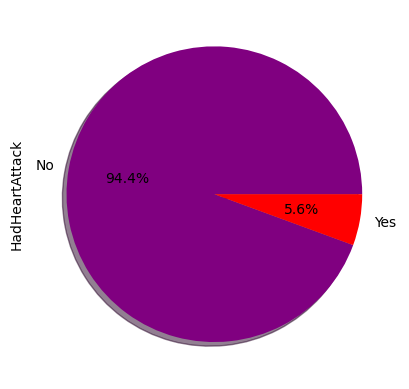

In [8]:
Heart_Attack_status = MidWestRegion["HadHeartAttack"].value_counts()
colors=['purple', 'red']
Heart_Attack_status.plot.pie(autopct = "%1.1f%%", colors=colors, shadow=True )


plt.show()

In [9]:
##States total count (yes and no)
states_MidWest= MidWestRegion.groupby(["State"])["HadHeartAttack"].count()
states_MidWest

State
Illinois        2607
Indiana         5502
Iowa            5672
Kansas          6145
Michigan        5370
Minnesota       9161
Missouri        4195
Nebraska        5107
North Dakota    2498
Ohio            8995
South Dakota    4405
Wisconsin       6126
Name: HadHeartAttack, dtype: int64

In [10]:
# States with Heart Attacks 
Heart_Attack_status = MidWestRegion[MidWestRegion['HadHeartAttack']=="Yes"].groupby('State').size()
Heart_Attack_status

State
Illinois        108
Indiana         339
Iowa            271
Kansas          331
Michigan        301
Minnesota       396
Missouri        243
Nebraska        344
North Dakota    138
Ohio            589
South Dakota    294
Wisconsin       327
dtype: int64

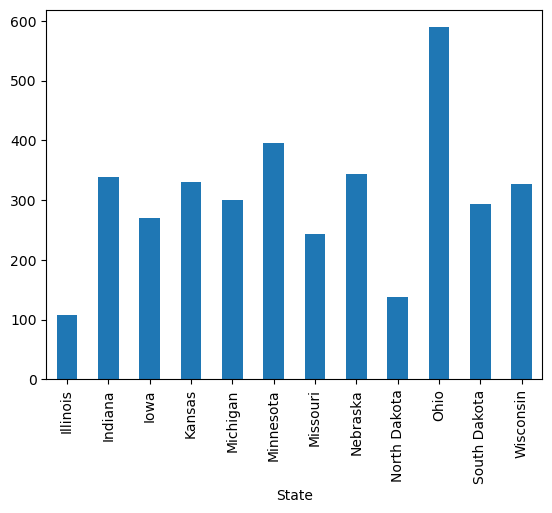

In [11]:
Heart_Attack_status = MidWestRegion[MidWestRegion['HadHeartAttack']=="Yes"].groupby('State').size()
Heart_Attack_status.plot(kind="bar", )

plt.show()

In [12]:
#no heart attack by gender

In [13]:
No_Heart_attack_gender=MidWestRegion.groupby('Sex')['Sex'].count()
No_Heart_attack_gender

Sex
Female    33622
Male      32161
Name: Sex, dtype: int64

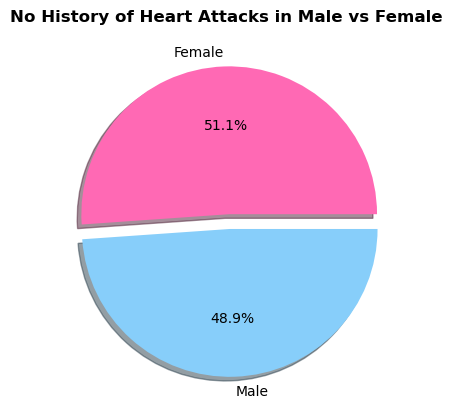

In [14]:
colors=['hotpink','lightskyblue']
labels=No_Heart_attack_gender.index
explode=(0, 0.1)
plt.pie(No_Heart_attack_gender,  explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("No History of Heart Attacks in Male vs Female ", fontweight='bold')
plt.show()

In [15]:
#heart attack by gender

In [16]:
Heart_Attack_status_gender = MidWestRegion[MidWestRegion['HadHeartAttack']=="Yes"].groupby('Sex').size()
Heart_Attack_status_gender

Sex
Female    1325
Male      2356
dtype: int64

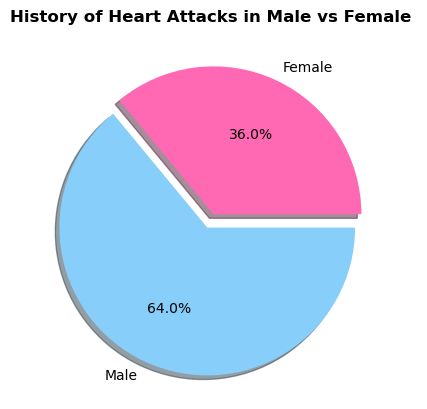

In [17]:
colors=['hotpink','lightskyblue']
labels=Heart_Attack_status_gender.index
explode=(0, 0.1)
plt.pie(Heart_Attack_status_gender,  explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("History of Heart Attacks in Male vs Female ", fontweight='bold')
plt.show()

In [18]:
#Stroke Information section

In [19]:

Stroke_Status=MidWestRegion["HadStroke"].value_counts()
Stroke_Status

No     63146
Yes     2637
Name: HadStroke, dtype: int64

In [20]:
Stroke_Status_df=pd.DataFrame({"HadStroke":["Yes","No"],
                               "Total":["63146","2637"] })
Stroke_Status_df

,HadStroke,Total
0,Yes,63146
1,No,2637


In [21]:
#Stroke by gender

In [22]:
No_Stroke_gender = MidWestRegion[MidWestRegion['HadStroke']=="No"].groupby('Sex').size()
No_Stroke_gender

Sex
Female    32290
Male      30856
dtype: int64

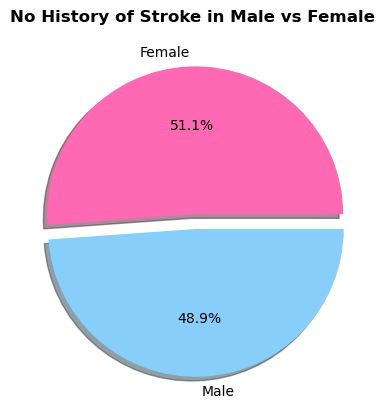

In [23]:
colors=['hotpink','lightskyblue']
labels=No_Stroke_gender.index
explode=(0, 0.1)
plt.pie(No_Stroke_gender,  explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("No History of Stroke in Male vs Female ", fontweight='bold')
plt.show()

In [24]:
Stroke_gender = MidWestRegion[MidWestRegion['HadStroke']=="Yes"].groupby('Sex').size()
Stroke_gender

Sex
Female    1332
Male      1305
dtype: int64

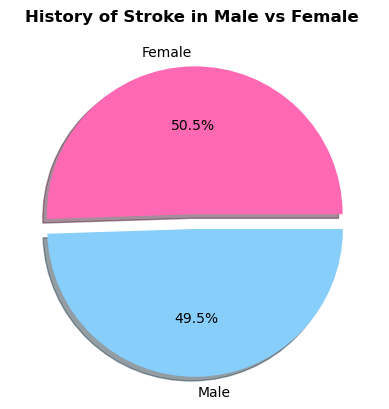

In [25]:
colors=['hotpink','lightskyblue']
labels=No_Stroke_gender.index
explode=(0, 0.1)
plt.pie(Stroke_gender,  explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("History of Stroke in Male vs Female ", fontweight='bold')
plt.show()

In [26]:
#list of states with to stroke 
Stroke_Status = MidWestRegion[MidWestRegion['HadStroke']=="Yes"].groupby('State').size()

Stroke_Status

State
Illinois        102
Indiana         281
Iowa            227
Kansas          226
Michigan        211
Minnesota       289
Missouri        199
Nebraska        196
North Dakota     84
Ohio            393
South Dakota    171
Wisconsin       258
dtype: int64

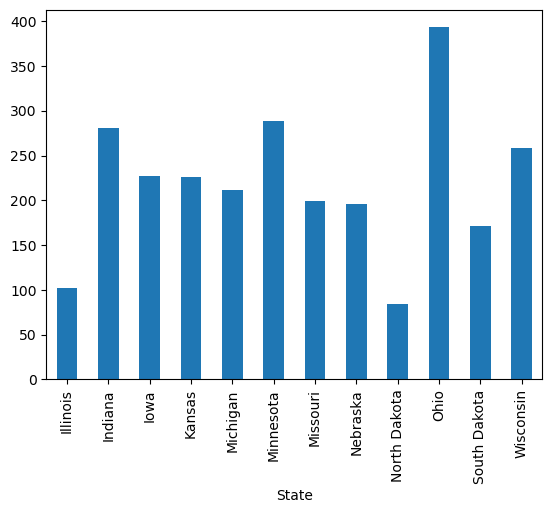

In [27]:
Stroke_Status = MidWestRegion[MidWestRegion['HadStroke']=="Yes"].groupby('State').size()
Stroke_Status.plot(kind="bar", )

plt.show()

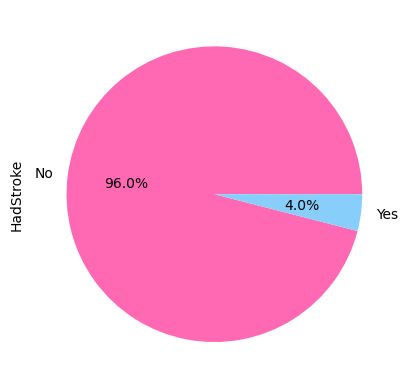

In [28]:
Stroke_Status = MidWestRegion["HadStroke"].value_counts()
Stroke_Status.plot.pie(autopct = "%1.1f%%", colors=colors)
colors=['purple', 'yellow']
plt.show()

In [29]:
#Smoker section

In [30]:

smoker_status = MidWestRegion["SmokerStatus"].value_counts()
smoker_status

Never smoked                             38554
Former smoker                            18212
Current smoker - now smokes every day     6742
Current smoker - now smokes some days     2275
Name: SmokerStatus, dtype: int64

In [31]:
smoker_status_df= pd.DataFrame({"Smoker Status": ["Never smoked", "Former smoker", "Current smoker-now smokes every day","Current smoker-now smokes some days"],
                               "Total": ["38554","18212","6342","2275"]})
smoker_status_df.head()

,Smoker Status,Total
0,Never smoked,38554
1,Former smoker,18212
2,Current smoker-now smokes every day,6342
3,Current smoker-now smokes some days,2275


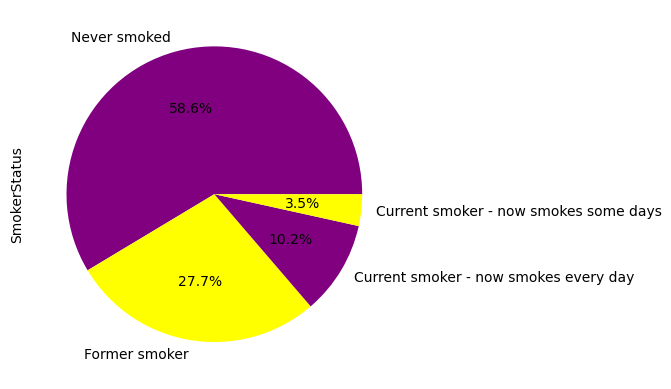

In [32]:
smoker_status = MidWestRegion["SmokerStatus"].value_counts()
smoker_status.plot.pie(autopct = "%1.1f%%", colors=colors)
colors=['red','blue','green','yellow']
plt.show()

In [33]:
#E cigarette Section

In [34]:
Ecigarette_Status= MidWestRegion["ECigaretteUsage"].value_counts()
Ecigarette_Status

0    51382
1    11164
2     1686
3     1551
Name: ECigaretteUsage, dtype: int64

In [35]:
Ecigarette_Status_df= pd.DataFrame ({"ECigaretteUsage": ["Never used e-cigarettes in my entire life", "Not at all (right now)", "Use them every day", "Use them some days"],
                                     "Total":["51382","11164","1686","1551"]})
Ecigarette_Status_df
                                

,ECigaretteUsage,Total
0,Never used e-cigarettes in my entire life,51382
1,Not at all (right now),11164
2,Use them every day,1686
3,Use them some days,1551


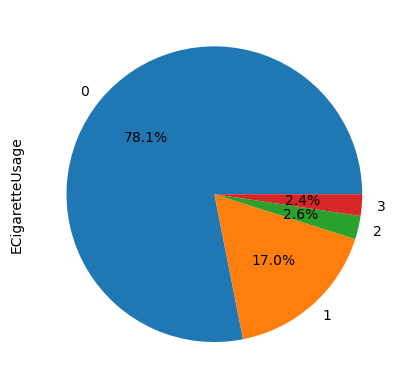

In [36]:
Ecigarette_Status = MidWestRegion["ECigaretteUsage"].value_counts()
Ecigarette_Status.plot.pie(autopct = "%1.1f%%")
plt.show()

In [37]:
#Gender section

In [38]:
gender_count = MidWestRegion["Sex"].value_counts()
gender_count

Female    33622
Male      32161
Name: Sex, dtype: int64

In [39]:
gender_count_df=  pd.DataFrame ({"Sex":["Female","Male"],
                               "Total":[" 33622","32161"] })
gender_count_df.head()

,Sex,Total
0,Female,33622
1,Male,32161


In [40]:
#BMI section

In [41]:
BMI_Average_States = MidWestRegion.groupby(["State"])["BMI"].mean()
BMI_Average_States

State
Illinois        28.759720
Indiana         29.493295
Iowa            29.416075
Kansas          29.109403
Michigan        28.658443
Minnesota       28.687714
Missouri        29.237654
Nebraska        29.283527
North Dakota    29.089143
Ohio            29.704753
South Dakota    29.131339
Wisconsin       29.290663
Name: BMI, dtype: float64

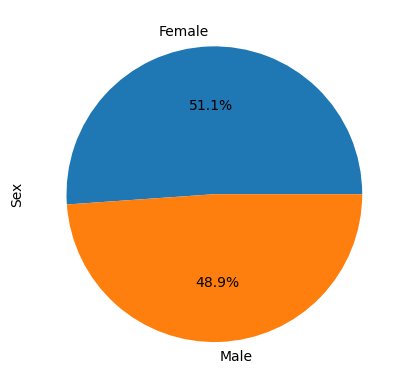

In [42]:
gender_count = MidWestRegion["Sex"].value_counts()
gender_count.plot.pie(autopct = "%1.1f%%")
plt.show()

In [43]:
#Ethnnicity section

In [44]:
Ethnicity=  MidWestRegion["RaceEthnicityCategory"].value_counts()
Ethnicity

White only, Non-Hispanic         55712
Black only, Non-Hispanic          3863
Hispanic                          3021
Other race only, Non-Hispanic     2176
Multiracial, Non-Hispanic         1011
Name: RaceEthnicityCategory, dtype: int64

In [45]:
Ethnicity_df=pd.DataFrame ({"RaceEthnicityCategory":["White only, Non-Hispanic","Black only, Non-Hispanic","Hispanic","Other race only, Non-Hispanic","Multiracial, Non-Hispanic"],
                               "Total":[" 55712","3863","3021","2176","1011"] })
Ethnicity_df

,RaceEthnicityCategory,Total
0,"White only, Non-Hispanic",55712
1,"Black only, Non-Hispanic",3863
2,Hispanic,3021
3,"Other race only, Non-Hispanic",2176
4,"Multiracial, Non-Hispanic",1011


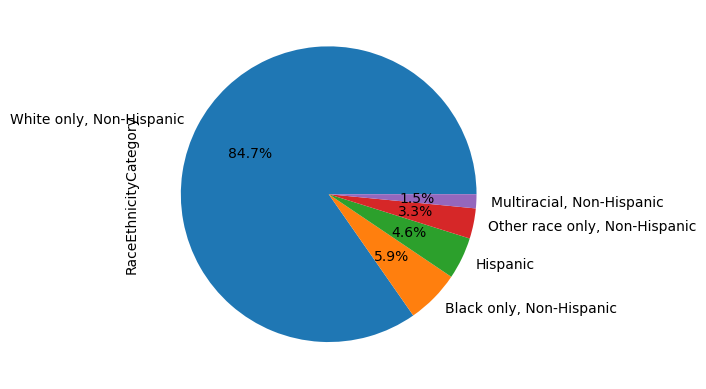

In [46]:
Ethnicity = MidWestRegion["RaceEthnicityCategory"].value_counts()
Ethnicity.plot.pie(autopct = "%1.1f%%")
plt.show()

In [47]:
#teeth remove section 

In [48]:
Teeth_remove=  MidWestRegion["RemovedTeeth"].value_counts()
Teeth_remove

0    35743
1    19548
2     6646
3     3846
Name: RemovedTeeth, dtype: int64

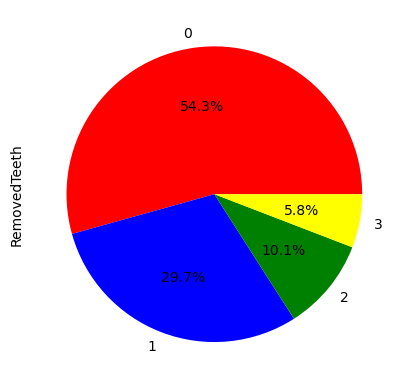

In [49]:
Teeth_remove = MidWestRegion["RemovedTeeth"].value_counts()
colors=['red','blue','green','yellow']
Teeth_remove.plot.pie(autopct = "%1.1f%%", colors=colors)
plt.show()

In [50]:
# alcohol/ heart attack 

In [51]:
alcohol_heart=MidWestRegion.groupby(['AlcoholDrinkers'])['HadHeartAttack'].count()
alcohol_heart

AlcoholDrinkers
0    28526
1    37257
Name: HadHeartAttack, dtype: int64

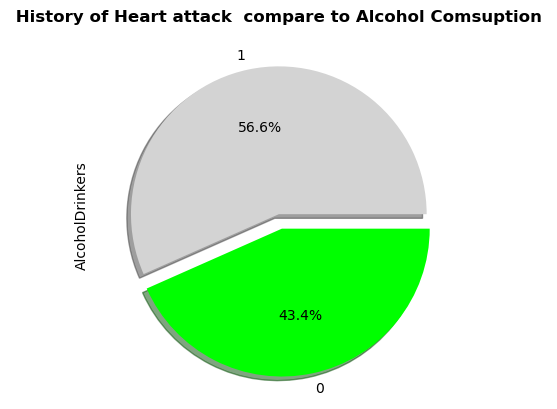

In [52]:
alcohol_heart = MidWestRegion["AlcoholDrinkers"].value_counts()
colors= ('lightgray','lime')
explode=(0, 0.1)
plt.title(" History of Heart attack  compare to Alcohol Comsuption ", fontweight='bold')
alcohol_heart.plot.pie(autopct = "%1.1f%%",colors=colors, explode=explode, shadow=True)
plt.show()

In [53]:
# alcohol/ Stroke 

In [54]:
alcohol_stroke=MidWestRegion.groupby(['AlcoholDrinkers'])['HadStroke'].count()
alcohol_stroke

AlcoholDrinkers
0    28526
1    37257
Name: HadStroke, dtype: int64

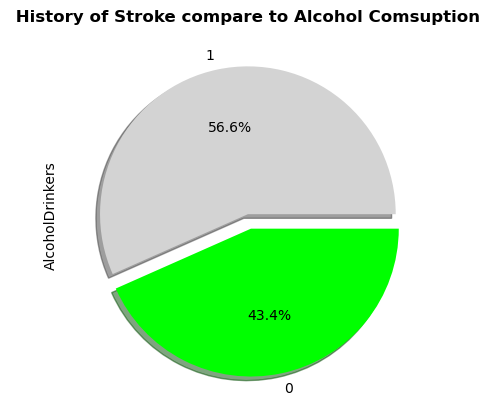

In [55]:
alcohol_stroke = MidWestRegion["AlcoholDrinkers"].value_counts()
colors= ('lightgray','lime')
explode=(0, 0.1)
plt.title(" History of Stroke compare to Alcohol Comsuption ", fontweight='bold')
alcohol_stroke.plot.pie(autopct = "%1.1f%%",colors=colors, explode=explode, shadow=True)
plt.show()

In [56]:
#General Health section 

In [57]:
General_Health=MidWestRegion.groupby(['GeneralHealth'])['State'].count()
General_Health

GeneralHealth
0    10126
1    23977
2    21253
3     8026
4     2401
Name: State, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

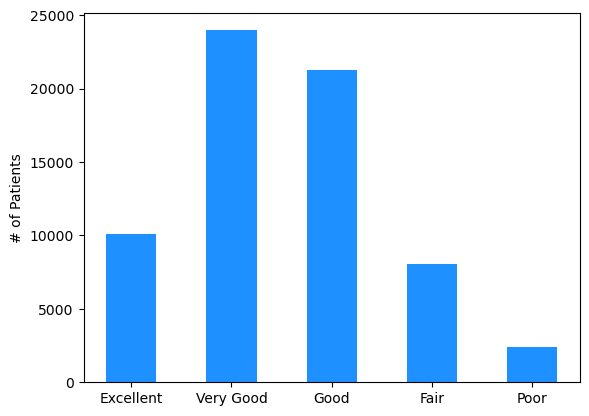

In [60]:
gen=MidWestRegion.groupby('GeneralHealth').size()
xvalue=np.arange(len(gen))
yvalue=gen
plt.bar(xvalue,yvalue, color='dodgerblue', width=0.5)
tick_locations = [value for value in xvalue]
plt.ylabel('# of Patients')
plt.xticks(tick_locations, ["Excellent", "Very Good", "Good", "Fair", "Poor"])
plt.show